<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/logo2.png" width="200" />
</center>

<h2 style="color: #00BFFF;">Lab - Intro to OpenCV & Scikit-image</h2>

For this lab, we will learn how to open images using openCV and do some basic image pre-processing with scikit-image:
- OpenCV: https://opencv.org/
- Scikit-image: https://scikit-image.org/

<h3 style="color: #0099CC;">Prerequisites:</h3>

In [ ]:
# pip install opencv-python
# pip install scikit-image

In [1]:
# 📚 Basic libraries
import numpy as np # images will be converted to a numpy array
from matplotlib import pyplot as plt # 2D visualizations
import warnings
warnings.filterwarnings("ignore")

# 🌐 Computer Vision 
import cv2 # computer vision management 
from skimage.transform import rescale, resize, downscale_local_mean # computer vision pre-processing

# 🤖 Computer Vision Machine Learning

# Circular and Elliptical Hough Transforms\
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks # 
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

# Trainable segmentation using local features and random forests
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

## Challenge 1: Opening an Image

In this exercise, you will modify the number of filters in a convolutional layer and observe the impact on the feature maps.

### Instructions:
- Download a .jpg (for example) image
- Put that image in the folder containing your jupyternotebook

### Task:
1. Use imread function from opencv to open the image file

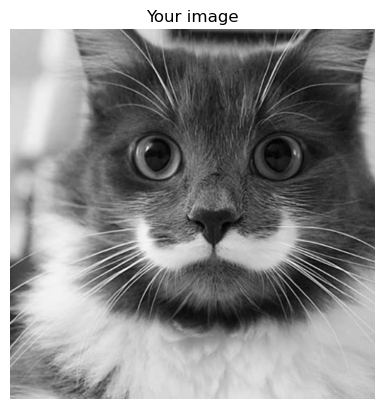

In [2]:
# Load your own image
image = cv2.imread('cat.png', 0) # 0 for grayscale

# Plotting it in a Euclidean space
plt.imshow(image, 'gray') # image, grayscale color
plt.title('Your image') # title
plt.axis('off') # removing the axis
plt.show()

## Challenge 2: Play with the Image

For some pre-processing techniques, having the image inverted helps to detect contorns. E.g: Hough transform.

### Instructions:
- For this challenge, try to invert the colors of the image.

### Task:
- Use StackOverFlow, Google and the libraries (OpenCV) to solve the challenge. 
- Avoid ChatGPT...

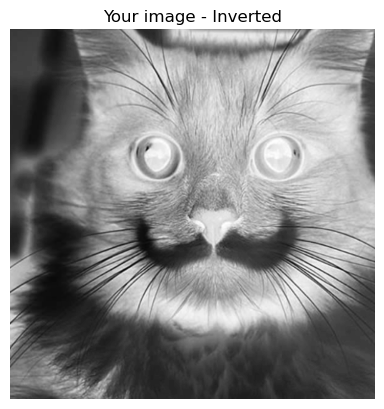

In [3]:
# Inverted images colors (dark background and bridge contorns make it easier for Hough transform)
# Your code to invert the image here:
inverted_image_correct = 255 - image

# Showing the image
plt.imshow(inverted_image_correct, 'gray') # image, grayscale color
plt.title('Your image - Inverted') # title
plt.axis('off') # removing the axis
plt.show()

## Challenge 3: Hough transform

Hough Transform is an image processing technique used to detect features of a particular shape within an image, specially to detect lines, circle and other parametric shapes.

In [5]:
from skimage.transform import hough_line, hough_line_peaks # Hough transform

In [6]:
# Classic straight-line Hough transform
# You can increase/decrease  the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 800, 900, endpoint=False)

### Instructions:
- Adapt the code below to apply Hough Transform to your image:
* Hint: Use `hough_line` imported function

In [7]:
# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

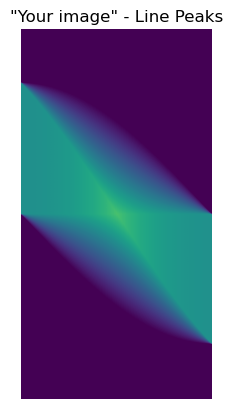

In [8]:
plt.imshow(hspace) # image, grayscale color
plt.title('"Your image" - Line Peaks') # title
plt.axis('off') # removing the axis
plt.show()

## Challenge 4: Resize the image

It's used to normalize the size of images in a dataset.

### Instructions:
- Play with the settings

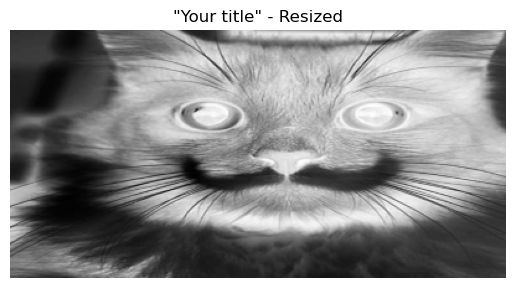

In [13]:
img_resized = resize(image, (200, 400), # ⚙️ play with the settings
                     anti_aliasing = True)

# Showing the image
plt.imshow(img_resized, 'gray') # image, grayscale color
plt.title('"Your title" - Resized') # title
plt.axis('off') # removing the axis
plt.show()

## Challenge 5: Downscale the image

Downscaling is odd, similar to reescaling; the dimensions of the image are reduced, but it can also lead to quality lost. It's usually followed by upscaling to retain important details from an image.

### Instructions:
- Play with the settings

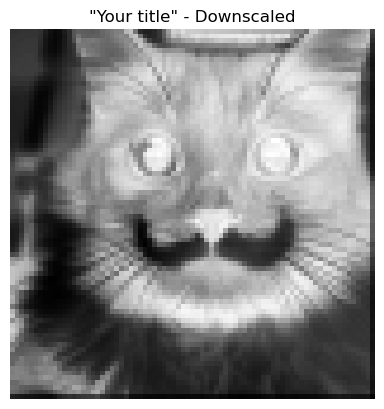

In [14]:
img_downscaled = downscale_local_mean(image, (8, 8)) # ⚙️ play with the settings

# Showing the image
plt.imshow(img_downscaled, 'gray') # image, grayscale color
plt.title('"Your title" - Downscaled') # title
plt.axis('off') # removing the axis
plt.show()

## Challenge 6: Object Detection using canny edges and Hough transform

Using scikit-image, we are gonna use canny edges and Hough transform to detect the circles:

The straight line is normally paramaterized as: y = mx + b,

Where **m** is the slope and **b** is the intercept.

NOTE: **m** goes to infinity for vertical lines

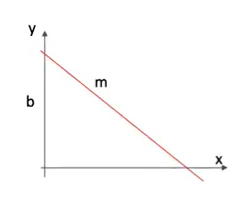

This line can also be represented as:

r = r cos 0 + y sin 0

Where **r** is the distance from the origin to the closest point on the straight line. (r, 0) corresponds to the Hough space representation of a line.

### Instructions:
- Play with the settings to make it work:

In [15]:
# Load picture and detect edges
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

In [16]:
# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

In [17]:
# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

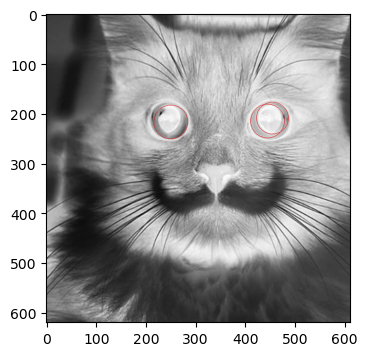

In [18]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()